In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [2]:
stocks = ['AAPL', 'WMT', 'TSLA','AMZN','DB','GE']
weights = np.array([1/6, 1/6, 1/6, 1/6,1/6, 1/6])
start_date = '2012-01-01'
end_date = '2022-10-08'
initial_investment = 1000000
c_level = 0.01


In [3]:
def download_data():
    stock_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date,end= end_date)['Close']
        

    return pd.DataFrame(stock_data)


def returns(data):
    log_returns = np.log(data/data.shift(1))
    return log_returns[1:]


In [4]:
stockdata = ['SPY','EMBC','ITIC','MNDO','TSE','COIN','SI','BTC-USD']
def download_data1():
    stockdata1 = {}
    for i in stockdata:
        ticker = yf.Ticker(i)
        stockdata1[i] = ticker.history(start=start_date,end=end_date)['Close']
    return pd.DataFrame(stockdata1)


data1 = download_data1()
daily_returns1 = returns(data1).dropna()
COV_matrix1 = daily_returns1.cov()
corr1_matrix = daily_returns1.corr()

In [10]:
spycov = COV_matrix1['SPY']['SPY']
btcvar = COV_matrix1['BTC-USD']['BTC-USD']
matrix1 = COV_matrix1 / spycov
betas = matrix1[0:1]
betas

,SPY,EMBC,ITIC,MNDO,TSE,COIN,SI,BTC-USD
SPY,1.0,0.631468,0.760172,0.332163,1.526323,3.211863,2.854368,1.364992


In [13]:
Matrix2 = COV_matrix1 / btcvar
betas1 = Matrix2[0:1]
betas1

,SPY,EMBC,ITIC,MNDO,TSE,COIN,SI,BTC-USD
SPY,0.236679,0.149455,0.179917,0.078616,0.361249,0.760182,0.67557,0.323066


In [6]:
dataset = download_data()
daily_returns = returns(dataset)
COV_matrix = daily_returns.cov() 
MU = daily_returns.mean() 
corr_matrix = daily_returns.corr()
port_MU = MU.dot(weights) # dot product of daily returns mean and weights vector.
port_stdev = np.sqrt(weights.T.dot(COV_matrix).dot(weights)) # transpose weights vector and dot product it with covariance matrix and then with weights vector to get portfolio variance W.T * COV_M * W = port.std

mean_invest = (1+port_MU) * initial_investment # convert mean and sigma to dollar value
stdev_invest = port_stdev * initial_investment

cutoff1 = norm.ppf(c_level,mean_invest,stdev_invest) # percent point function, with a 5% significance level, mu, sigma


In [7]:
var1 = initial_investment - cutoff1
print('your 1 day VaR is', round(var1,2 ), ' with a 95% probability')

your 1 day VaR is 32788.32  with a 95% probability


In [8]:
# value at risk over a multi period time frame

var_array = []
num_days = int(15)
for x in range(1, num_days + 1):# for loop to display VaR for the next set amount of days
    var_array.append(round(var1 * np.sqrt(x),2)) # var increases at a rate of sqrt(X) per day, T+2 would be VaR1*sqrt(2)*sqrt(3)*sqrt(4) ?
    print(str(x)+ 'day Var @ set confidence level:' + str(round(var1 * np.sqrt(x),2)))

1day Var @ set confidence level:32788.32
2day Var @ set confidence level:46369.69
3day Var @ set confidence level:56791.04
4day Var @ set confidence level:65576.64
5day Var @ set confidence level:73316.92
6day Var @ set confidence level:80314.66
7day Var @ set confidence level:86749.75
8day Var @ set confidence level:92739.38
9day Var @ set confidence level:98364.97
10day Var @ set confidence level:103685.78
11day Var @ set confidence level:108746.56
12day Var @ set confidence level:113582.08
13day Var @ set confidence level:118219.98
14day Var @ set confidence level:122682.67
15day Var @ set confidence level:126988.63


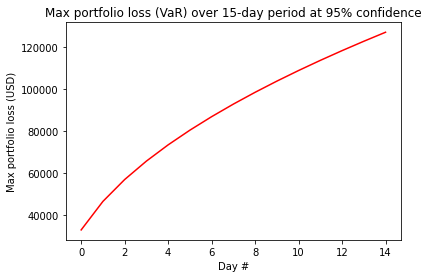

In [9]:

plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period at 95% confidence")
plt.plot(var_array, "r")